In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('spam.csv',  encoding='iso-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


#Check the Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [7]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


#Data Preprocessing

In [8]:
del df['Unnamed: 2']
del df['Unnamed: 3']
del df['Unnamed: 4']

In [9]:
df.rename(columns = {'v1':'Category', 'v2':'Message'}, inplace = True)

In [10]:
spam = df.groupby('Category')['Message'].count()
spam

Category
ham     4825
spam     747
Name: Message, dtype: int64

In [11]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df['spam'] = label_encoder.fit_transform(df['Category'])
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


#Data visulization

In [30]:
df['spam'].value_counts()

0    4825
1     747
Name: spam, dtype: int64

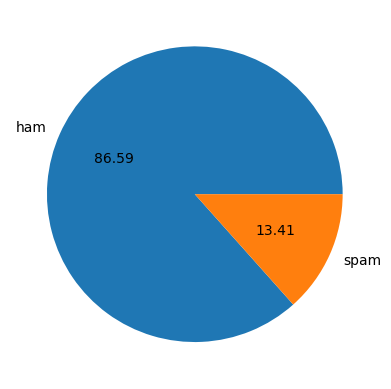

In [31]:
plt.pie(df['spam'].value_counts(), labels=['ham','spam'], autopct='%0.2f')
plt.show()

#Feature selection

In [12]:
x = df['Message']
y = df['spam']

#Data splitting

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()

In [15]:
# Email converted into number matrix

x_train_count = v.fit_transform(x_train.values)
x_train_count.toarray()[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

#Model selection and implimentation (MultinomialNB)

In [16]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

#Model training

In [17]:
model.fit(x_train_count, y_train)

MultinomialNB()

#Model evaluations

In [18]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails_count = v.transform(emails)
model.predict(emails_count)

array([0, 1])

In [19]:
x_test_count = v.transform(x_test)
model.predict(x_test_count)

array([0, 1, 0, ..., 0, 1, 0])

In [20]:
model.score(x_test_count, y_test)

0.986244019138756

In [21]:
pred = model.predict(x_test_count)

In [22]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, pred)
cm

array([[1451,    6],
       [  17,  198]], dtype=int64)

In [23]:
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ('Vectorizer' , CountVectorizer()),
    ('nb' , MultinomialNB())
])

In [24]:
clf.fit(x_train, y_train)

Pipeline(steps=[('Vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [25]:
clf.score(x_test, y_test)

0.986244019138756

In [26]:
pred2 = clf.predict(x_test)

In [27]:
cm2 = confusion_matrix(y_test, pred2)
cm2

array([[1451,    6],
       [  17,  198]], dtype=int64)

In [33]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 98.62%
